# Exercises for linear regression

In [268]:
## importing necessary packages
import numpy as np
import pandas as pd
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt


## Exercise 0

,X,y
0,133.752233,314.387643
1,126.446926,294.546191
2,93.568911,120.381904
3,8.760282,39.238195
4,204.387557,346.638324
...,...,...
395,65.165356,42.076804
396,72.207613,140.829473
397,48.206944,166.699991
398,201.184310,355.456194


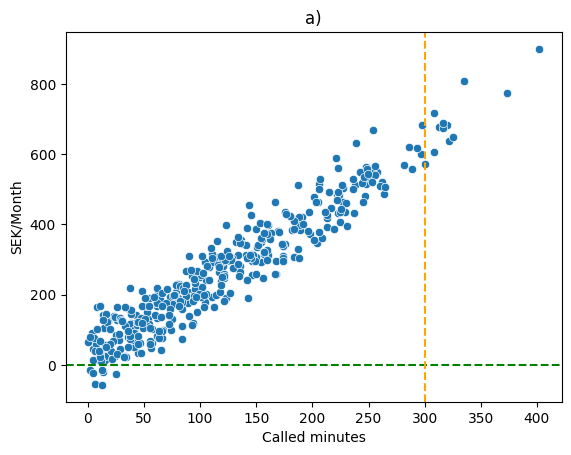

In [269]:
## a) 

np.random.seed =  42

# Generate simulated data
x = np.random.normal(100,100, 400)
x = np.absolute(x)
# Generate 
E = np.random.normal(0, 50, 400)

data = {"X" : x, "y": (x*2 + 25 + E)}
df  = pd.DataFrame(data)

display(df)
ax = sns.scatterplot(df, y="y", x="X")
ax.set(title="a)", ylabel="SEK/Month", xlabel="Called minutes")

ax = plt.axhline(0, color="green", linestyle= "dashed")
ax = plt.axvline(300, color="orange", linestyle= "dashed")

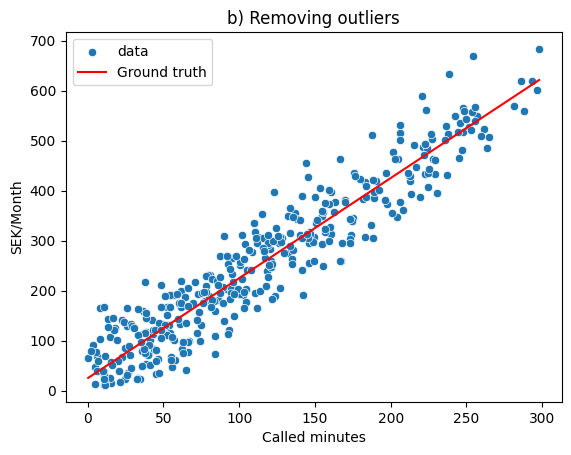

In [270]:
## b) 


## Dropping negative costs.
df.drop(df.loc[df["y"] < 0].index, inplace=True)

## Drop every call over 300 min
df.drop(df.loc[df["X"] > 300].index, inplace=True)

## Plot the new plot
ax = sns.scatterplot(df, x="X", y = "y", label="data")
ax.set(title="b) Removing outliers", ylabel="SEK/Month", xlabel="Called minutes")



## Calculate y_hat with given values for B1,B0
beta_0 = 25
beta_1 = 2
y_hat = lambda x: beta_0 + beta_1*x
ax = sns.lineplot(df, x="X", y=y_hat(df["X"]), color="red", label="Ground truth")


In [271]:
## X = Minutes, Y = Cost in SEK/Month
df.head()
df["X"]

0      133.752233
1      126.446926
2       93.568911
3        8.760282
4      204.387557
          ...    
395     65.165356
396     72.207613
397     48.206944
398    201.184310
399     54.111691
Name: X, Length: 381, dtype: float64

##  1.  Train, test split


In [272]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction= 0.7, random_state=42, replace=False):
    
    X_train = X.sample(n=int(len(X)*train_fraction), random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)

    y_train = y.sample(n=int(len(y)*train_fraction), random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)


    return(X_train, X_test, y_train, y_test)
    

X_tr, X_te, y_tr, y_te = train_test_split(df["X"], df["y"])


print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)


(266,) (115,) (266,) (115,)


## 2. Simple linear regression with normal equation

30.32300516553895 1.9602381584099429 29.398426071837484 1.9737779056031401


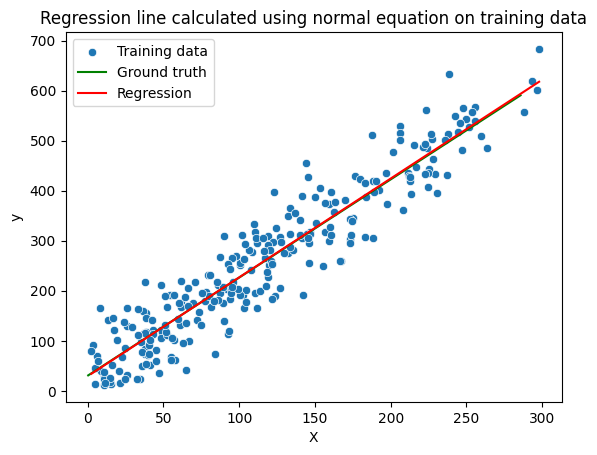

In [273]:
ax = sns.scatterplot(x=X_tr, y=y_tr, label="Training data")
ax.set_title("Regression line calculated using normal equation on training data")

beta_1, beta_0 = np.polyfit(X_te,y_te, deg=1)

def test_y_hat(x):
    return beta_0 + beta_1*x



## Ground truth with test data
ax = sns.lineplot(x=X_te, y=test_y_hat(X_te), color="green", label="Ground truth")


# Regression line with training data
X_tr = np.array(X_tr)
y_tr = np.array(y_tr)

beta_1_tr, beta_0_tr  = np.polyfit(X_tr, y_tr, deg=1)

def beta_hat_tr(x):
    return beta_0_tr + beta_1_tr*x

ax = sns.lineplot(x=X_tr, y=beta_hat_tr(X_tr), color="Red", label="Regression")

print(beta_0, beta_1, beta_0_tr, beta_1_tr)

## 3. Prediction and evaluation

(38.83658734563489, 2311.079060544096, 48.07368365898432)

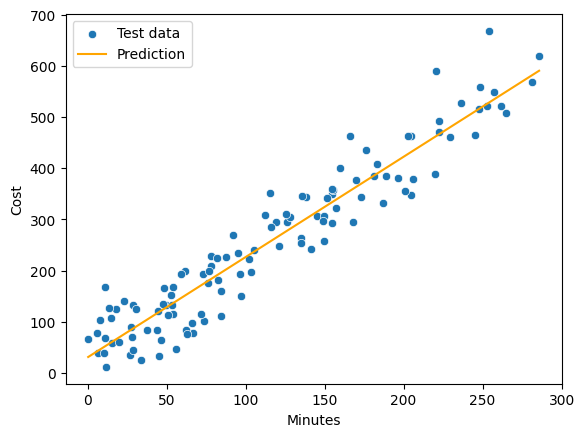

In [274]:
ax = sns.scatterplot(x=X_te, y=y_te, label="Test data")
y_pred = test_y_hat(X_te)

ax = sns.lineplot(x=X_te, y=y_pred, color="Orange", label="Prediction")
ax.set(ylabel="Cost", xlabel="Minutes")

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)

mae, mse, rmse

## 4. More variables
Adding mean start cost(25kr), mean sms cost(50öre), surf/GB(50kr), per/minute(2kr)  

$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$

In [277]:
# Mean costs
start_cost = 25
cost_per_minute = 2 # x1
cost_per_text =  0.5 # x2
cost_per_gb = 50 # x3



x1 = np.abs(np.random.normal(100,100,10000))
x2 = np.random.randint(0,50,10000)
x3 = np.abs(np.random.normal(0,2,10000))
E = np.random.normal(0,50, 10000)

df = pd.DataFrame({
    "Minutes" : x1, "SMS":x2, "GB":x3, "E":E
})

# y = lambda x , y, z, e: 25 + 2*x +  0.5*y + 50*z + e
# df.insert(0,"Y", y(df["X1"], df["X2"], df["X3"], df["E"]))
df.insert(0,"Cost", (25 + 2*df["Minutes"]+ 0.5*df["SMS"] + 50*df["GB"] + df["E"]))
df.insert(0, "Intercept", 1)

df = df.drop(["E"], axis="columns")
df.info()
display(df.head())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Intercept  10000 non-null  int64  
 1   Cost       10000 non-null  float64
 2   Minutes    10000 non-null  float64
 3   SMS        10000 non-null  int32  
 4   GB         10000 non-null  float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 351.7 KB


,Intercept,Cost,Minutes,SMS,GB
0,1,325.940008,55.458387,27,3.192092
1,1,236.731722,98.122485,7,2.567785
2,1,169.406405,31.410049,31,0.021106
3,1,134.200279,13.558251,42,1.036589
4,1,575.428606,243.424647,5,0.755187


,Intercept,Cost,Minutes,SMS,GB
9995,1,800.214730,337.130804,47,1.262521
9996,1,441.676061,103.398804,48,2.825564
9997,1,333.140301,91.301467,15,2.595603
9998,1,139.563004,49.242143,47,0.054121
9999,1,752.970844,321.199331,31,2.822988


Index(['Cost', 'Minutes', 'SMS', 'GB'], dtype='object')


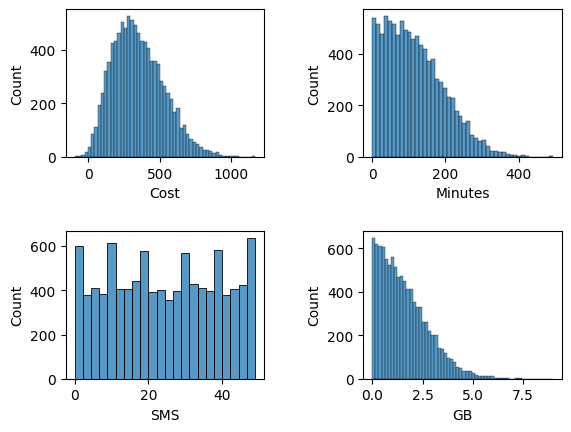

In [ ]:
plot_cols = df.columns[1:]
print(plot_cols)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i, col in enumerate(plot_cols):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=df[col], ax=ax)
    

In [ ]:
df1 = df.query("Cost > 0" and "GB < 4" and "Minutes < 300")
df1.head()

,Intercept,Cost,Minutes,SMS,GB
0,1,502.396003,149.671415,41,2.263011
1,1,179.072107,86.173570,16,0.031570
2,1,430.008213,164.768854,30,0.808925
3,1,647.244277,252.302986,33,2.625826
4,1,398.016588,76.584663,37,3.388079


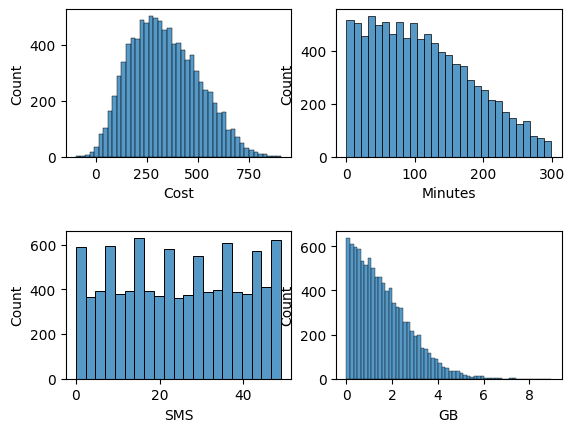

In [ ]:

plt.subplots_adjust(hspace=0.5) 
for i, col in enumerate(plot_cols):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(data=df1, x=df1[col], ax=ax)

## 5. Multiple linear regression

In [ ]:
df.head()

,Intercept,Cost,Minutes,SMS,GB
0,1,502.396003,149.671415,41,2.263011
1,1,179.072107,86.173570,16,0.031570
2,1,430.008213,164.768854,30,0.808925
3,1,647.244277,252.302986,33,2.625826
4,1,398.016588,76.584663,37,3.388079


In [ ]:
## 5. a)

X = df.drop(columns="Cost", axis="columns")
Y = df["Cost"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, Y_test.shape

((8000, 4), (2000,))

In [278]:
# 5. b) 

# Training model witg regression  fit
regression_fit = lambda X, Y: np.linalg.pinv(X.T @ X) @ X.T @ Y

beta_hat = regression_fit(X_train, Y_train)
beta_hat.values

array([24.43000557,  2.00333407,  0.4814317 , 50.14330996])

In [285]:
# 5. c) 

# Prediction on test split

predict = lambda x, beta: x @ beta

y_hat = predict(X_test.to_numpy(), beta_hat)
print(y_hat)
y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (4,1)))
print(y_hat)




[880.22571545  77.23234606 263.14404663 ... 591.88714937 428.4676676
 110.95104053]
[[880.22571545]
 [ 77.23234606]
 [263.14404663]
 ...
 [591.88714937]
 [428.4676676 ]
 [110.95104053]]
